# <font color='blue'>Deep Learning II</font>

# Recurrent Neural Networks

Redes Neurais Recorrentes ou RNNs são um tipo especial de rede neural projetada para problemas sequenciais. Considerando uma rede padrão Multilayer Perceptron, uma rede neural recorrente pode ser pensada como a adição de loops à arquitetura. Por exemplo, em uma dada camada, cada neurônio pode passar seu sinal para frente (feed-forward) e também para o lado. 

Uma Rede Neural Recorrente é basicamente uma rede neural que pode ser usada quando seus dados são tratados como uma sequência, onde a ordem particular dos pontos de dados é importante e esta sequência pode ser de comprimento arbitrário.

O exemplo mais claro é talvez uma série temporal de números, onde a tarefa é prever o próximo valor de acordo com valores anteriores. A entrada para a RNN em cada passo de tempo é o valor atual, bem como um vetor de estado que representa o que a rede "viu" no tempo - etapas anteriores. Este estado-vetor é a memória codificada da RNN, inicialmente definida como zero.

## Prevendo Séries Temporais com Multilayer Perceptron


Previsão do distanciamento social em Minas Gerais.

## Conjunto de Dados

Usaremos conjuntos de dados que mostram o distanciamento social em Minas Gerais. Os dados tem registros de 15/02/2020 a 29/01/2021.

Será fornecido 1 dataset com 2 colunas, data e distanciamento social.

In [1]:
import tensorflow as tf
tf.__version__

C:\Users\Guto\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'2.0.0'

In [2]:
import keras as k
k.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
# Imports
import math
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

from pandas.tseries.offsets import DateOffset
from time import time

# Imports para visualização de dados
import matplotlib as m

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [4]:
# Random seed 
numpy.random.seed(7)

In [5]:
# Carrega os dados
dataframe = pd.read_csv("./data/AIH.csv")
dataframe['Data'] = pd.to_datetime(dataframe.Data, format = '%d/%m/%Y')
dataframe = dataframe.set_index('Data')

dataset = dataframe.values
dataset = dataset.astype('float32')

In [6]:
# Dados
dataframe.head()

,QT_INTER
Data,
2020-02-15,31.6
2020-02-16,38.9
2020-02-17,24.0
2020-02-18,26.5
2020-02-19,27.8


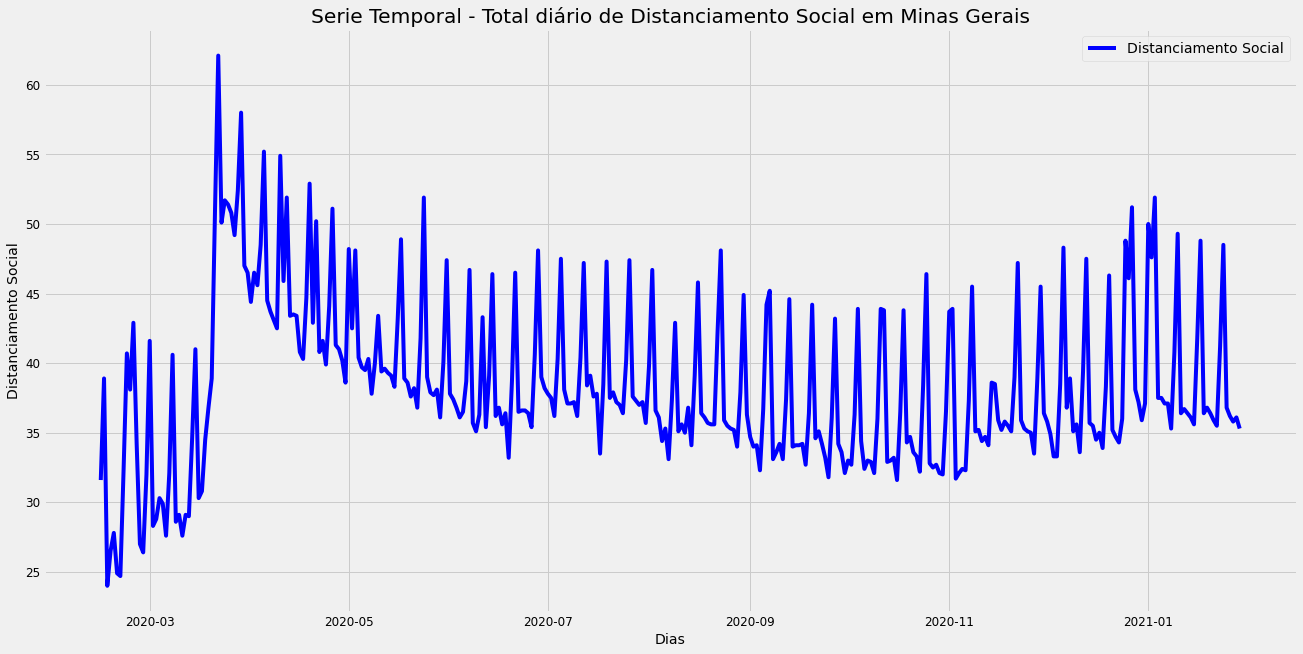

In [7]:
# Plot
plt.title("Serie Temporal - Total diário de Distanciamento Social em Minas Gerais")
plt.plot(dataframe, label = "Distanciamento Social", color = 'blue')
plt.xlabel("Dias")
plt.ylabel("Distanciamento Social")
plt.legend(loc = "best")

In [8]:
# Split em treino e teste
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

262 88


In [9]:
# Agora podemos definir uma função para criar um novo conjunto de dados como descrito acima. A função
# recebe 2 argumentos: o conjunto de dados, que é um array NumPy que queremos converter em um dataset e
# look back que é o número de etapas de tempo anteriores para usar como variáveis de entrada para prever
# O próximo período de tempo, neste caso, definido como 1. Esse padrão criará um conjunto de dados onde X é
# o número de passageiros em um determinado momento (t) e Y é o número de passageiros no próximo
# momento (t + 1). 
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [10]:
# Reshape em X = t e Y = t + 1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Imprimindo dataset de treino
#print(trainX[0:2], trainY[0:2])

# Imprimindo dataset original
#print("\n", dataset[0:3])

In [11]:
# Cria o modelo MLP - RNA - com 1 input, 1 camada oculta com 8 neurônios e uma camada de saída
model = Sequential()

# Camada oculta
model.add(Dense(8, input_dim = look_back, activation = 'relu'))

# Camada de saída
model.add(Dense(1))

# Compilação
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Fit do modelo
model.fit(trainX, trainY, epochs = 200, batch_size = 2, verbose = 2)

Epoch 1/200
 - 1s - loss: 1249.6153
Epoch 2/200
 - 0s - loss: 717.2298
Epoch 3/200
 - 0s - loss: 283.4270
Epoch 4/200
 - 0s - loss: 81.2385
Epoch 5/200
 - 0s - loss: 34.8758
Epoch 6/200
 - 0s - loss: 29.7126
Epoch 7/200
 - 0s - loss: 29.3004
Epoch 8/200
 - 0s - loss: 29.4857
Epoch 9/200
 - 0s - loss: 29.3394
Epoch 10/200
 - 0s - loss: 29.1498
Epoch 11/200
 - 0s - loss: 29.3734
Epoch 12/200
 - 0s - loss: 29.4469
Epoch 13/200
 - 0s - loss: 29.2852
Epoch 14/200
 - 0s - loss: 29.2406
Epoch 15/200
 - 0s - loss: 29.3288
Epoch 16/200
 - 0s - loss: 29.3414
Epoch 17/200
 - 0s - loss: 29.3832
Epoch 18/200
 - 0s - loss: 29.3577
Epoch 19/200
 - 0s - loss: 29.3709
Epoch 20/200
 - 0s - loss: 29.3284
Epoch 21/200
 - 0s - loss: 29.2891
Epoch 22/200
 - 0s - loss: 29.2609
Epoch 23/200
 - 0s - loss: 29.2330
Epoch 24/200
 - 0s - loss: 29.4234
Epoch 25/200
 - 0s - loss: 29.3563
Epoch 26/200
 - 0s - loss: 29.2462
Epoch 27/200
 - 0s - loss: 29.0928
Epoch 28/200
 - 0s - loss: 29.1976
Epoch 29/200
 - 0s - loss

In [13]:
# Estima a performance do modelo
# Tomando a raiz quadrada das estimativas de desempenho, podemos ver que o modelo tem um
# erro médio no conjunto de dados de treinamento e no conjunto de dados de teste.

trainScore = model.evaluate(trainX, trainY, verbose = 0)
print('Score em Treino: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose = 0)
print('Score em Teste: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

Score em Treino: 26.7637 MSE (5.1734 RMSE)
Score em Teste: 29.0670 MSE (5.3914 RMSE)


In [14]:
# Gera previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [15]:
# Ajusta os dados de treino para o Plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [16]:
# Ajusta os dados de teste para o Plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

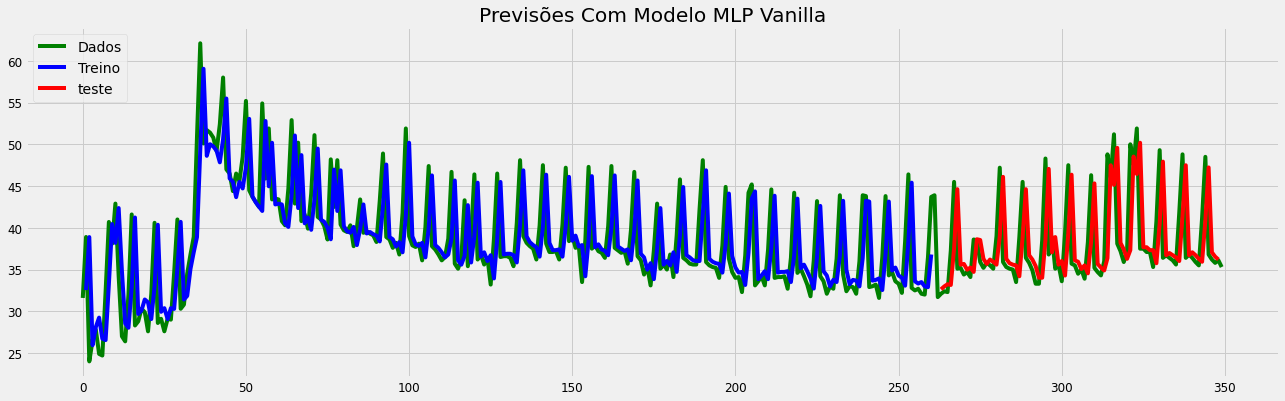

In [17]:
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Vanilla')
plt.plot(dataset, label = 'Dados', color = 'green')
plt.plot(trainPredictPlot, label = 'Treino', color = 'blue')
plt.plot(testPredictPlot, label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

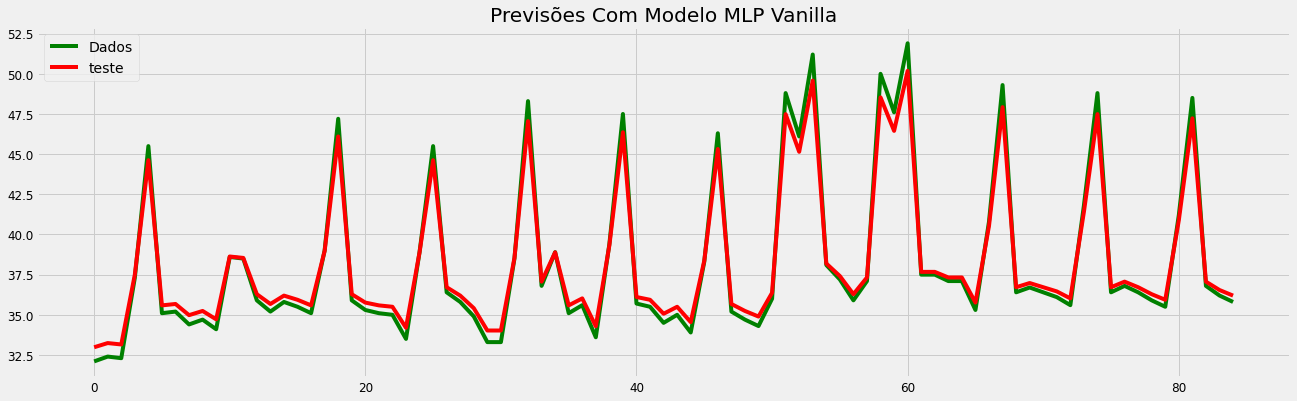

In [18]:
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Vanilla')
plt.plot(dataset[-len(testPredict)-1:-2], label = 'Dados', color = 'green')
plt.plot(testPredictPlot[-len(testPredict-1):], label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

## Prevendo Séries Temporais com Multilayer Perceptron e Usando Método Window

Podemos também tentar resolver o problema de modo que várias etapas de tempo recente possam ser usadas para a previsão do próximo passo. Isso é chamado de método de janela (Window) e o tamanho da janela é um parâmetro que pode ser sintonizado para cada problema. Por exemplo, dado o tempo atual (t) nós queremos prever o valor na próxima vez na sequência (t + 1), podemos usar o tempo atual (T) bem como os dois tempos anteriores (t-1 e t-2). Quando formulado como um problema de regressão, as variáveis de entrada são t-2, t-1, t e a variável de saída é t + 1.

In [19]:
# Carrega os dados
dataframe = pd.read_csv("./data/AIH.csv")
dataframe['Data'] = pd.to_datetime(dataframe.Data, format = '%d/%m/%Y')
dataframe = dataframe.set_index('Data')

target = dataframe['QT_INTER']
raw_values = target.values

dataset = dataframe.values
dataset = dataset.astype('float32')

In [20]:
# Split em treino e teste
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

262 88


In [21]:
# Reshape em X = t e Y = t + 10
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
# Modelo MLP
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 391.3697
Epoch 2/200
 - 0s - loss: 48.0173
Epoch 3/200
 - 0s - loss: 44.5864
Epoch 4/200
 - 0s - loss: 41.3511
Epoch 5/200
 - 0s - loss: 38.4994
Epoch 6/200
 - 0s - loss: 36.2063
Epoch 7/200
 - 0s - loss: 33.5600
Epoch 8/200
 - 0s - loss: 32.0214
Epoch 9/200
 - 0s - loss: 30.4559
Epoch 10/200
 - 0s - loss: 29.5594
Epoch 11/200
 - 0s - loss: 28.0583
Epoch 12/200
 - 0s - loss: 27.3638
Epoch 13/200
 - 0s - loss: 26.1440
Epoch 14/200
 - 0s - loss: 25.3927
Epoch 15/200
 - 0s - loss: 25.1440
Epoch 16/200
 - 0s - loss: 23.5784
Epoch 17/200
 - 0s - loss: 23.9428
Epoch 18/200
 - 0s - loss: 22.2380
Epoch 19/200
 - 0s - loss: 22.4178
Epoch 20/200
 - 0s - loss: 21.4272
Epoch 21/200
 - 0s - loss: 20.7893
Epoch 22/200
 - 0s - loss: 20.8145
Epoch 23/200
 - 0s - loss: 20.1453
Epoch 24/200
 - 0s - loss: 19.4305
Epoch 25/200
 - 0s - loss: 18.7153
Epoch 26/200
 - 0s - loss: 18.5828
Epoch 27/200
 - 0s - loss: 17.7378
Epoch 28/200
 - 0s - loss: 17.6344
Epoch 29/200
 - 0s - loss: 1

In [23]:
# Performance do Modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Score em Treino: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Score em Teste: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

Score em Treino: 9.8603 MSE (3.1401 RMSE)
Score em Teste: 8.4794 MSE (2.9119 RMSE)


In [24]:
# Previsões para treino e teste
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [25]:
# Ajustando as previsões de treino para o Plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajustando as previsões de teste para o Plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

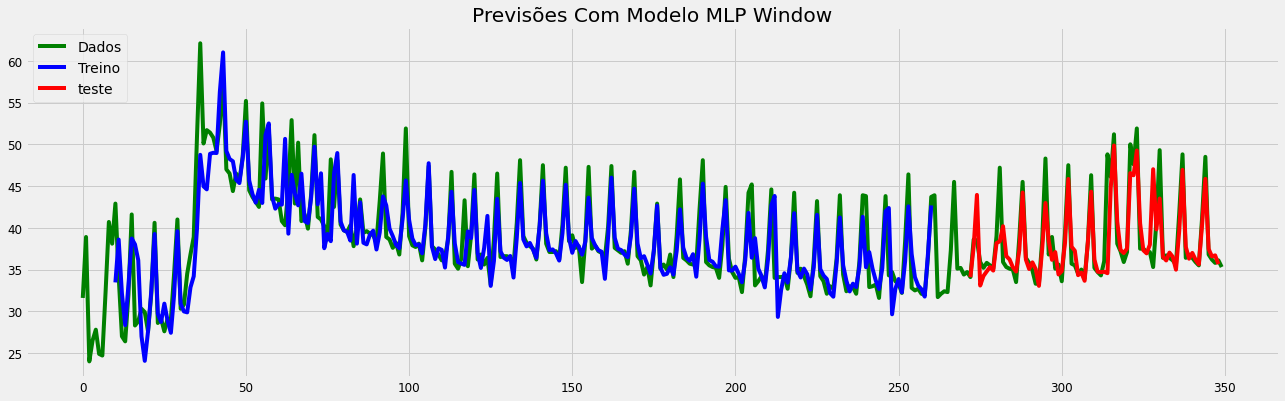

In [26]:
# Plot do baseline e previsões
# Podemos ver que o erro foi reduzido em comparação com o da seção anterior. 
# O tamanho da janela e a arquitetura da rede não foram sintonizados, isso é apenas uma demonstração de como
# enquadrar um problema de previsão em séries temporais. 
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Window')
plt.plot(dataset, label = 'Dados', color = 'green')
plt.plot(trainPredictPlot, label = 'Treino', color = 'blue')
plt.plot(testPredictPlot, label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

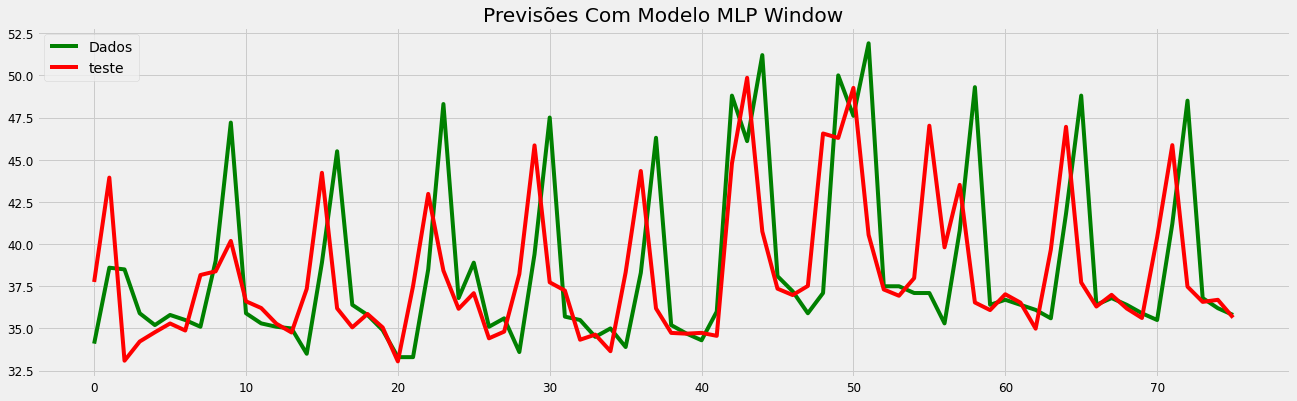

In [27]:
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Window')
plt.plot(test[-len(testPredict)-1:-2], label = 'Dados', color = 'green')
plt.plot(testPredictPlot[-len(testPredict-1):], label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

## Vamos fazer o Forecasting para 77 dias de horizonte de previsão

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Fazemos uma previsão em uma etapa
def forecast_lstm(model, X):
    X = X.reshape(1, look_back)
    yhat = model.predict(X)
#    yhat1 = scaler.inverse_transform(yhat)
    return yhat[0,0]

In [30]:
# Validação direta nos dados de teste

# Lista para as previsões
previsoes_lstm = list()

# Previsões

for i in range(len(testX)):   
   
    # Ajusta o shape dos dados de teste
    X, y = testX[i], testY[i]
    
    # Previsão

    yhat = forecast_lstm(model, X)
    
    # Armazena o forecast
    previsoes_lstm.append(yhat)
    expected = raw_values[len(testX) + i ]
    
    print('Mês = %d, Valor Previsto = %f, Valor Esperado = %f' % (i + 1, yhat, expected))

Mês = 1, Valor Previsto = 34.080471, Valor Esperado = 42.500000
Mês = 2, Valor Previsto = 37.754345, Valor Esperado = 48.100000
Mês = 3, Valor Previsto = 43.938786, Valor Esperado = 40.400000
Mês = 4, Valor Previsto = 33.089184, Valor Esperado = 39.700000
Mês = 5, Valor Previsto = 34.224606, Valor Esperado = 39.500000
Mês = 6, Valor Previsto = 34.774555, Valor Esperado = 40.300000
Mês = 7, Valor Previsto = 35.294971, Valor Esperado = 37.800000
Mês = 8, Valor Previsto = 34.877613, Valor Esperado = 40.000000
Mês = 9, Valor Previsto = 38.167599, Valor Esperado = 43.400000
Mês = 10, Valor Previsto = 38.383686, Valor Esperado = 39.400000
Mês = 11, Valor Previsto = 40.187752, Valor Esperado = 39.600000
Mês = 12, Valor Previsto = 36.608883, Valor Esperado = 39.300000
Mês = 13, Valor Previsto = 36.210629, Valor Esperado = 39.100000
Mês = 14, Valor Previsto = 35.281113, Valor Esperado = 38.300000
Mês = 15, Valor Previsto = 34.761494, Valor Esperado = 43.200000
Mês = 16, Valor Previsto = 37.3468

In [31]:
# Última data da série
target.index[-1]

Timestamp('2021-01-29 00:00:00')

In [32]:
# Cria sequência de datas a partir da última data da nossa série original

datas_para_prever_forecasting = [target.index[-1] + DateOffset(days = x) for x in range(0, 78)]

In [33]:
# Objetos do tipo pd.Series dão mais trabalho para manipular. Vamos converter a série original em dataframe.
df_original = pd.DataFrame(target)

In [34]:
# Vamos agora criar um novo dataframe 
# O índice (data) será a sequência de datas futuras
# O nome da coluna de dados extraímos da série original
# ATENÇÃO: Não estamos extraindo os dados da série original, somente o nome da coluna
data_futuras = pd.DataFrame(index = datas_para_prever_forecasting[1:], columns = df_original.columns)

In [35]:
# Visualiza os dados
# Entendeu por que os valores NaN? São datas futuras, e precisamos agora incluir nossas previsões.
data_futuras

,QT_INTER
2021-01-30,NaN
2021-01-31,NaN
2021-02-01,NaN
2021-02-02,NaN
2021-02-03,NaN
...,...
2021-04-12,NaN
2021-04-13,NaN
2021-04-14,NaN
2021-04-15,NaN


In [36]:
# Usamos as datas futuras para extrair as previsões do nosso modelo
df_predict = pd.DataFrame(testPredict,
                          index = data_futuras.index, columns = ['Prediction'])

In [37]:
df_predict

,Prediction
2021-01-30,34.080471
2021-01-31,37.754345
2021-02-01,43.938786
2021-02-02,33.089184
2021-02-03,34.224606
...,...
2021-04-12,45.863991
2021-04-13,37.477314
2021-04-14,36.575340
2021-04-15,36.697254


In [38]:
# Concatenamos a série original com os valores de forecasting de 77 dias além da série
df_forecasting = pd.concat([df_original, df_predict], axis = 1)

In [39]:
# Visualiza o dataframe
df_forecasting

,QT_INTER,Prediction
2020-02-15,31.6,NaN
2020-02-16,38.9,NaN
2020-02-17,24.0,NaN
2020-02-18,26.5,NaN
2020-02-19,27.8,NaN
...,...,...
2021-04-12,NaN,45.863991
2021-04-13,NaN,37.477314
2021-04-14,NaN,36.575340
2021-04-15,NaN,36.697254


In [40]:
df_forecasting.to_csv(r'./data/DISForecastingMLPWindow.csv', index = False)

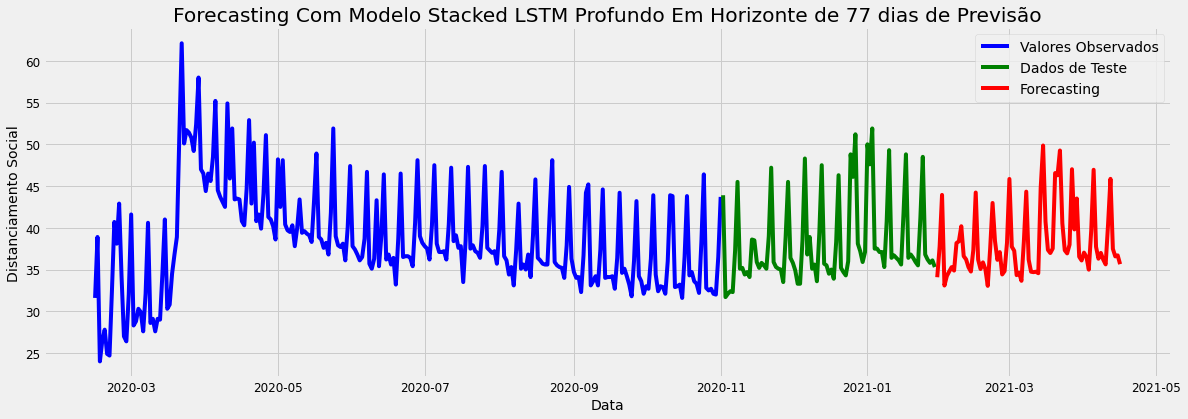

In [41]:
# Plot
plt.figure(figsize = (18, 6))

# Série original
plt.plot(target.index[0:261], target.values[0:261], label = 'Valores Observados', color = 'Blue')
plt.plot(target.index[261:], target.values[261:], label = 'Dados de Teste', color = 'green')

# Previsões
plt.plot(df_forecasting.index, df_forecasting['Prediction'], label = 'Forecasting',  color = 'Red')

plt.title('Forecasting Com Modelo Stacked LSTM Profundo Em Horizonte de 77 dias de Previsão')
plt.xlabel('Data')
plt.ylabel('Distanciamento Social')
plt.legend()
plt.show()

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade no portal da DSA: www.datascienceacademy.com.br

# Fim